In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import  models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
image_size = 250
channels = 1

In [3]:
training_data = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.1,
    zoom_range = 0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
)


In [4]:
train_gen = training_data.flow_from_directory(
    'Dataset_Split/train',
    target_size = (image_size,image_size),
    batch_size = 16,
    class_mode = 'sparse',
    color_mode = "grayscale",
)

Found 880 images belonging to 11 classes.


In [5]:
val_data = ImageDataGenerator(
    rescale = 1.0 / 255,
)

val_gen = val_data.flow_from_directory(
    'Dataset_Split/val',
    target_size=(image_size,image_size),
    batch_size=16,
    class_mode='sparse',
    color_mode = "grayscale",

)

Found 110 images belonging to 11 classes.


In [6]:
test_data = ImageDataGenerator(
    rescale=1.0/255,
)
test_gen = test_data.flow_from_directory(
    'Dataset_Split/test',
    target_size=(image_size, image_size),
    batch_size = 16,
    class_mode='sparse',
    color_mode = "grayscale",
)

Found 110 images belonging to 11 classes.


In [7]:
print(train_gen.class_indices)

{'Unknown': 0, '༠': 1, '༡': 2, '༢': 3, '༣': 4, '༤': 5, '༥': 6, '༦': 7, '༧': 8, '༨': 9, '༩': 10}


In [8]:
class_names = list(train_gen.class_indices.keys())
class_names

['Unknown', '༠', '༡', '༢', '༣', '༤', '༥', '༦', '༧', '༨', '༩']

In [9]:
input_shape = (image_size,image_size,channels)
class_labels = 11

model = models.Sequential([
    
    layers.InputLayer(input_shape = input_shape),
    # first layers of cnn
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    # second layers of cnn
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # third layers of cnn
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #fouth layers of cnn
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #flatten layers
    layers.Flatten(),
    
    #dense layers
    layers.Dense(64, activation= 'relu'),
    
    #out put layers
    layers.Dense(class_labels, activation='softmax'),
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [11]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
len(val_gen)

7

In [13]:
len(train_gen)

55

In [14]:
history = model.fit(
    train_gen,
    steps_per_epoch= len(train_gen),
    batch_size=16,
    validation_data=val_gen,
    validation_steps=len(val_gen),
    verbose = 1,
    epochs = 10,
)

Epoch 1/10
55/55 [==============================] - 41s 709ms/step - loss: 1.4829 - accuracy: 0.5159 - val_loss: 0.6562 - val_accuracy: 0.7818
Epoch 2/10
55/55 [==============================] - 48s 881ms/step - loss: 0.6115 - accuracy: 0.8011 - val_loss: 0.2378 - val_accuracy: 0.9273
Epoch 3/10
55/55 [==============================] - 31s 554ms/step - loss: 0.4724 - accuracy: 0.8523 - val_loss: 0.2278 - val_accuracy: 0.9182
Epoch 4/10
55/55 [==============================] - 45s 830ms/step - loss: 0.3377 - accuracy: 0.8932 - val_loss: 0.1433 - val_accuracy: 0.9455
Epoch 5/10
55/55 [==============================] - 54s 971ms/step - loss: 0.3211 - accuracy: 0.8932 - val_loss: 0.1365 - val_accuracy: 0.9545
Epoch 6/10
55/55 [==============================] - 55s 996ms/step - loss: 0.2743 - accuracy: 0.9080 - val_loss: 0.1711 - val_accuracy: 0.9636
Epoch 7/10
55/55 [==============================] - 25s 444ms/step - loss: 0.2415 - accuracy: 0.9227 - val_loss: 0.1749 - val_accuracy: 0.9455

In [15]:
score = model.evaluate(test_gen)

7/7 [==============================] - 2s 291ms/step - loss: 0.0343 - accuracy: 0.9909


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss vs Validation loss')

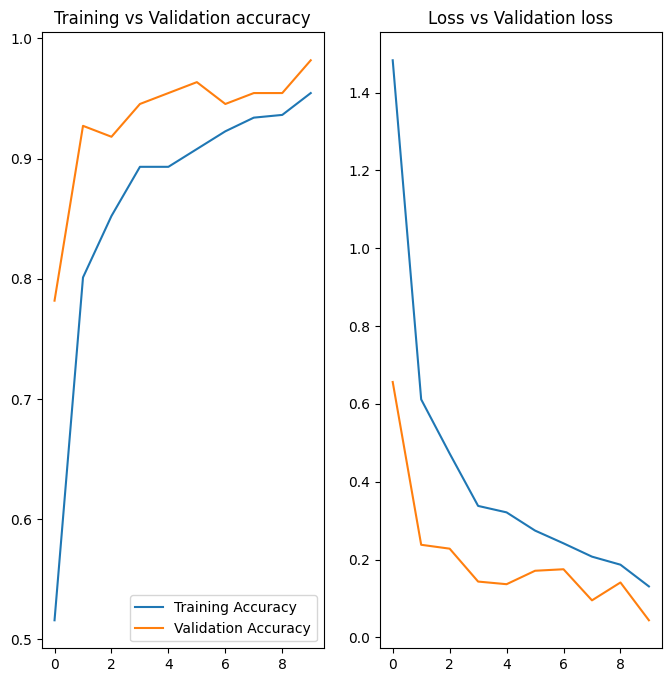

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 10
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs),val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training vs Validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label = 'Loss')
plt.plot(range(epochs),val_loss,label = 'Validation loss')
plt.title('Loss vs Validation loss')


first image to predict
actual label: ༠
1/1 [==============================] - 3s 3s/step
predicted label: ༠


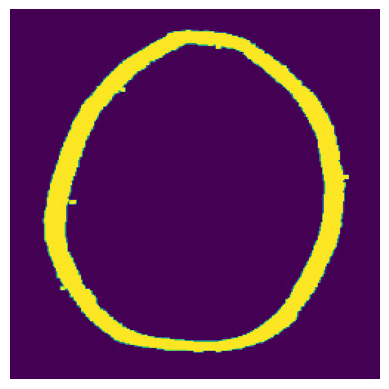

In [18]:
import numpy as np

for image_batch, label_batch in test_gen:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 95ms/step


C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3878 (\N{TIBETAN DIGIT SIX}) missing from current font.
  func(*args, **kwargs)
C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3874 (\N{TIBETAN DIGIT TWO}) missing from current font.
  func(*args, **kwargs)
C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3880 (\N{TIBETAN DIGIT EIGHT}) missing from current font.
  func(*args, **kwargs)
C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3875 (\N{TIBETAN DIGIT THREE}) missing from current font.
  func(*args, **kwargs)
C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3877 (\N{TIBETAN DIGIT FIVE}) missing from current font.
  func(*args, **kwargs)
C:\Users\GCIT\AppData\Roaming\Python\Python310\site-packages

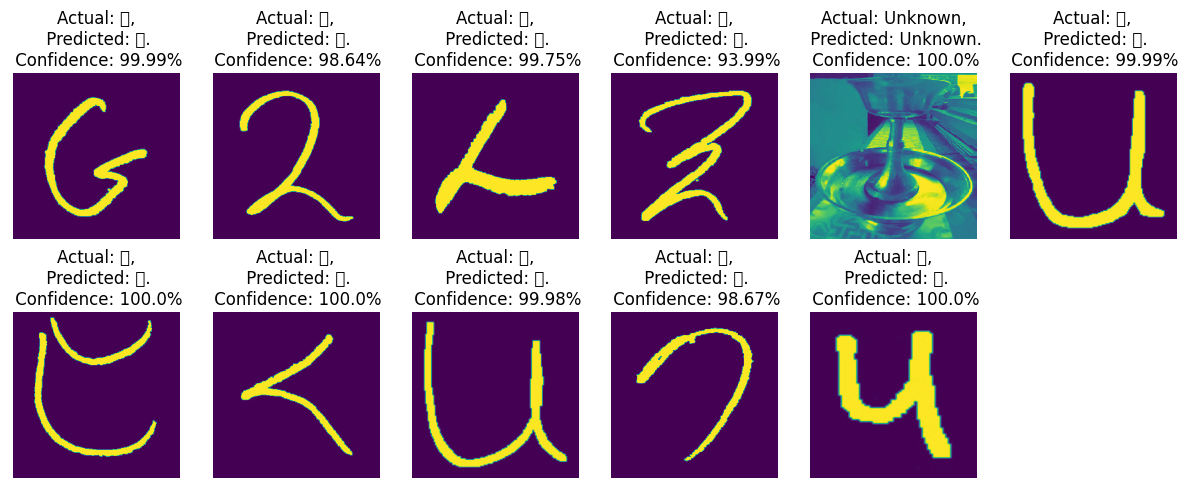

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_gen:
    for i in range(11):
        ax = plt.subplot(5, 6, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [21]:
model.save('Model_Handwriten.h5')

In [22]:
model.save("model")
saved_model_dir = "model/" 
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
model_lite = converter.convert()

with open("handwritten.tflite", 'wb') as f:
    f.write(model_lite)

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [23]:
labels = '\n' .join(sorted(
    train_gen.class_indices.keys()))
with open('labels.txt', 'w', encoding='utf-8') as f:
    f.write(labels)

[INFO] evaluating the model...
7/7 [==============================] - 2s 248ms/step


Text(0.5, 1.0, 'Confusion Matrix')

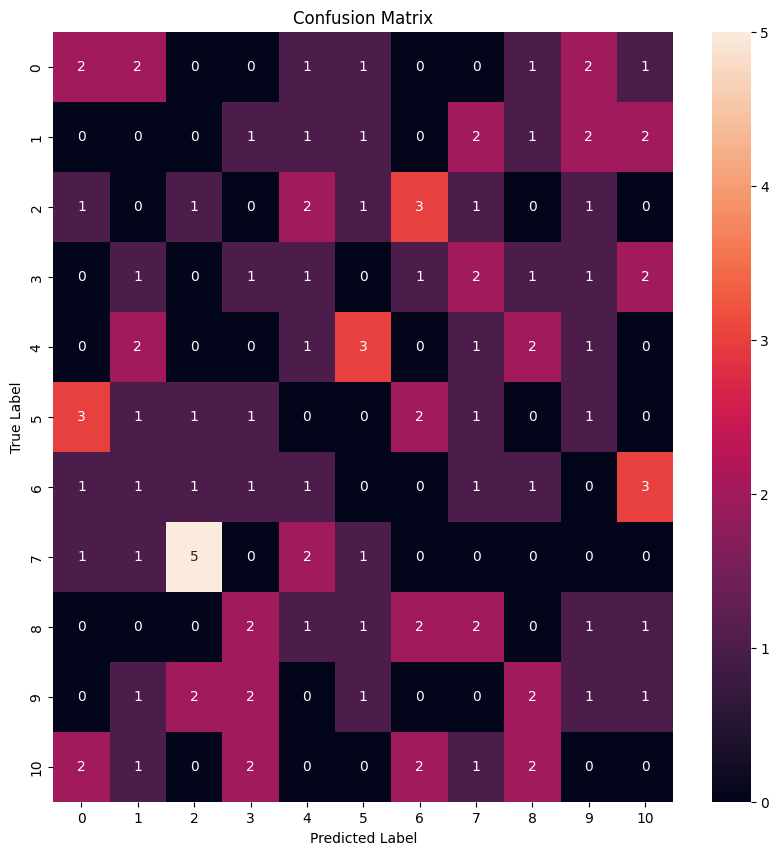

In [24]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
%matplotlib inline

# Reset the validation generator and evaluate the network after fine-tuning just the network head
print("[INFO] evaluating the model...")
test_gen.reset()
plt.figure(figsize=(10,10))
predIdxs = model.predict(test_gen, steps = len(test_gen))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_gen.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# print(classification_report(test_data.classes, predIdxs, target_names=test_data.class_indices.keys()))

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
from tensorflow import keras

In [37]:
model = keras.models.load_model('Model_Handwriten.h5')

In [38]:
import numpy as np 
prediction = model.predict(test_gen, steps = len(test_gen))
prediction = np.argmax(prediction,axis = 1)
prediction


7/7 [==============================] - 1s 75ms/step


array([ 7,  2,  9,  6,  3,  4,  4, 10,  6,  2,  6,  9,  5,  3,  1,  2,  4,
        7,  8,  6,  9,  1,  8,  6,  4,  5,  5,  1,  9,  8,  6,  7,  3,  3,
        0,  9,  5,  0,  2,  8,  3,  2,  4,  0,  8,  3,  1,  0,  7,  8,  2,
        1,  8,  6,  8,  5, 10, 10,  3,  5,  9,  1,  2,  0,  5,  7,  0,  4,
       10,  0,  9,  7,  6,  4,  4,  9,  0,  2, 10,  0,  2, 10,  4,  8,  4,
        7,  8,  3,  7,  1,  2,  7, 10,  3,  5,  6, 10,  6,  1,  7,  7,  1,
        9,  9, 10,  3, 10,  1,  5,  0], dtype=int64)

In [39]:
print(classification_report(test_gen.classes, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.10      0.10      0.10        10
           2       0.00      0.00      0.00        10
           3       0.20      0.20      0.20        10
           4       0.10      0.10      0.10        10
           5       0.22      0.20      0.21        10
           6       0.00      0.00      0.00        10
           7       0.09      0.10      0.10        10
           8       0.20      0.20      0.20        10
           9       0.00      0.00      0.00        10
          10       0.20      0.20      0.20        10

    accuracy                           0.10       110
   macro avg       0.10      0.10      0.10       110
weighted avg       0.10      0.10      0.10       110

